In [64]:
from algorithms import segmenter as seg

import numpy as np
from algorithms import common
import matplotlib.pyplot as plt
n_groups = 28
# data = np.genfromtxt('data/raw_2022-03-14_bcg.csv', delimiter=';')
#datastrip = data[14000:14400]
data = np.genfromtxt('data/experiments/sleepcheck2.csv', delimiter=';')
datastrip = data[100400:101200]

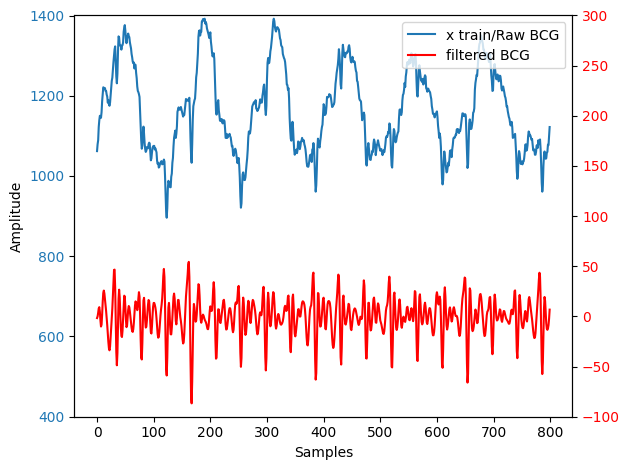

In [66]:

data_bp = common.filter_bandpass(datastrip,50,2,8)
fig, ax1 = plt.subplots()
lns1 = ax1.plot(datastrip, label='x train/Raw BCG')
plt.xlabel("Samples")
plt.ylabel("Amplitude")
ax2 = ax1.twinx()
lns2 = ax2.plot(data_bp, color='red', label='filtered BCG')
color = 'tab:blue'
#ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor='red')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set(ylim=(400,1400))
ax2.set(ylim=(-100,300))
# added these three lines
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=1)
fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


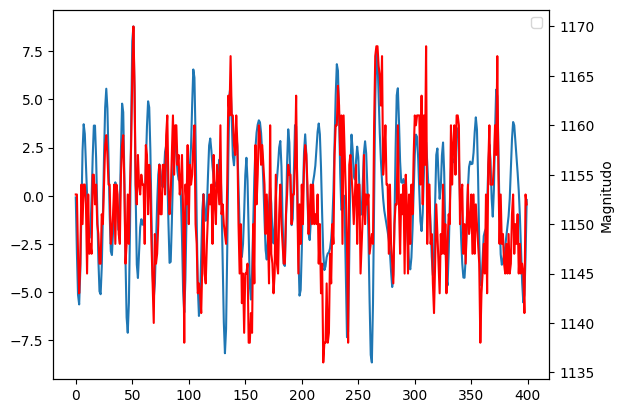

In [11]:
data_cubic = seg.enhance_signal(data_bp,50)
fig, ax1 = plt.subplots()
ax1.plot(data_cubic[0], label="filtrato")
# ax1.plot(data_cubic[1], '-',label="amplificato")
ax2 = ax1.twinx()
ax2.plot(datastrip, color='red')
plt.xlabel("Samples")
plt.ylabel("Magnitudo")
plt.legend()
plt.show()

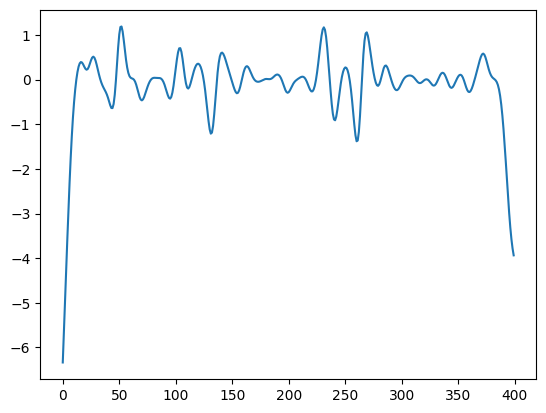

Text(0, 0.5, 'Magnitudo')

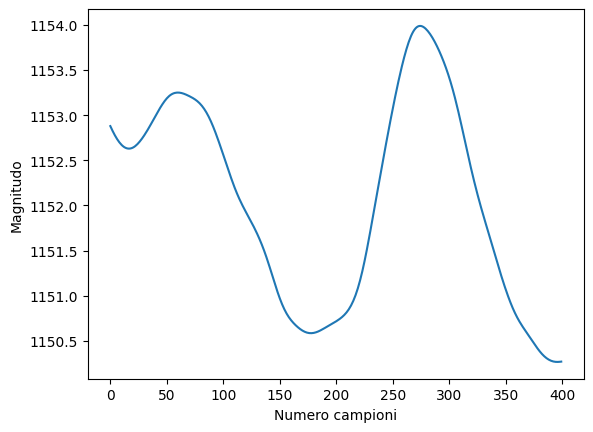

In [5]:
coarse = common.filter_lowpass(data_cubic[1],50,1.35)
plt.plot(coarse)
plt.show()
plt.figure()
respiratory=common.filter_lowpass(datastrip,50,0.38)
plt.plot(respiratory)
plt.xlabel("Numero campioni")
plt.ylabel("Magnitudo")